## Environment: Is Singapore putting in effort to gear the country towards a sustainable one?
## Name: Toh Kien Yu
## Class: DAAA/FT/1B/05
## Adm: 2222291

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


### Graphs

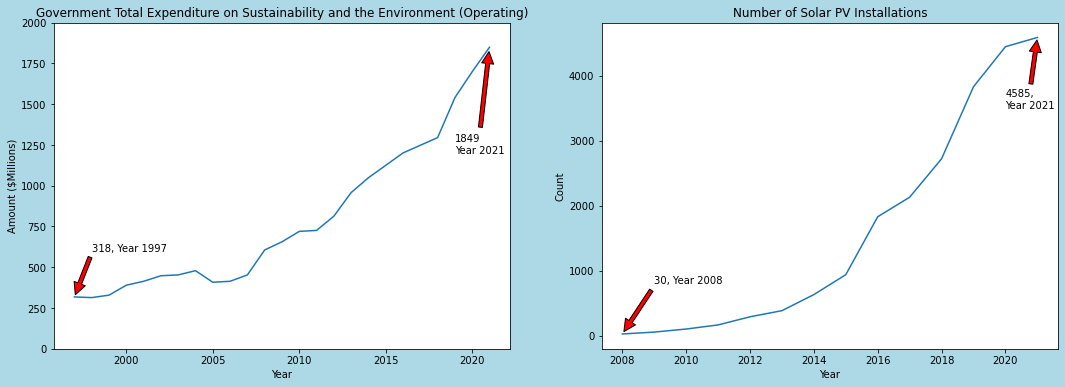

In [2]:
df = pd.read_csv('datasets/government-total-expenditure.csv',index_col='financial_year')
df3 = pd.read_csv('datasets/solar-pv-installations-by-ura-planning-region.csv')
#Cleaning data
df1 = df[(df.ministry == 'Sustainability and the Environment') & (df.type == 'Operating')]

df4 = df3.groupby(['year'])[['num_solar_pv_inst']].sum()

#Plotting the Graph
fig = plt.figure(figsize=(18,6))
fig.set_facecolor('lightblue')

ax = fig.add_subplot(121)
ax.plot(df1.index, df1['amount'])
ax.set_title('Government Total Expenditure on Sustainability and the Environment (Operating)')
ax.annotate("318, Year 1997", xy = (1997,318),xytext = (1998,600), arrowprops=dict(facecolor="red", shrink=0.05))
ax.annotate("1849\nYear 2021", xy = (2021,1849),xytext = (2019,1200), arrowprops=dict(facecolor="red", shrink=0.05))
ax.set_ylim(0,2000)
ax.set_xlabel('Year')
ax.set_ylabel('Amount ($Millions)')


ax2 = fig.add_subplot(122)
ax2.plot(df4.index,df4['num_solar_pv_inst'])
ax2.annotate("30, Year 2008", xy = (2008,30),xytext = (2009,800), arrowprops=dict(facecolor="red", shrink=0.05))
ax2.annotate("4585,\nYear 2021", xy = (2021,4585),xytext = (2020,3500), arrowprops=dict(facecolor="red", shrink=0.05))
ax2.set_title('Number of Solar PV Installations')
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
plt.show()

df1.to_csv('cleansedDatasets/expenditure.csv')
df4.to_csv('cleansedDatasets/solar.csv')

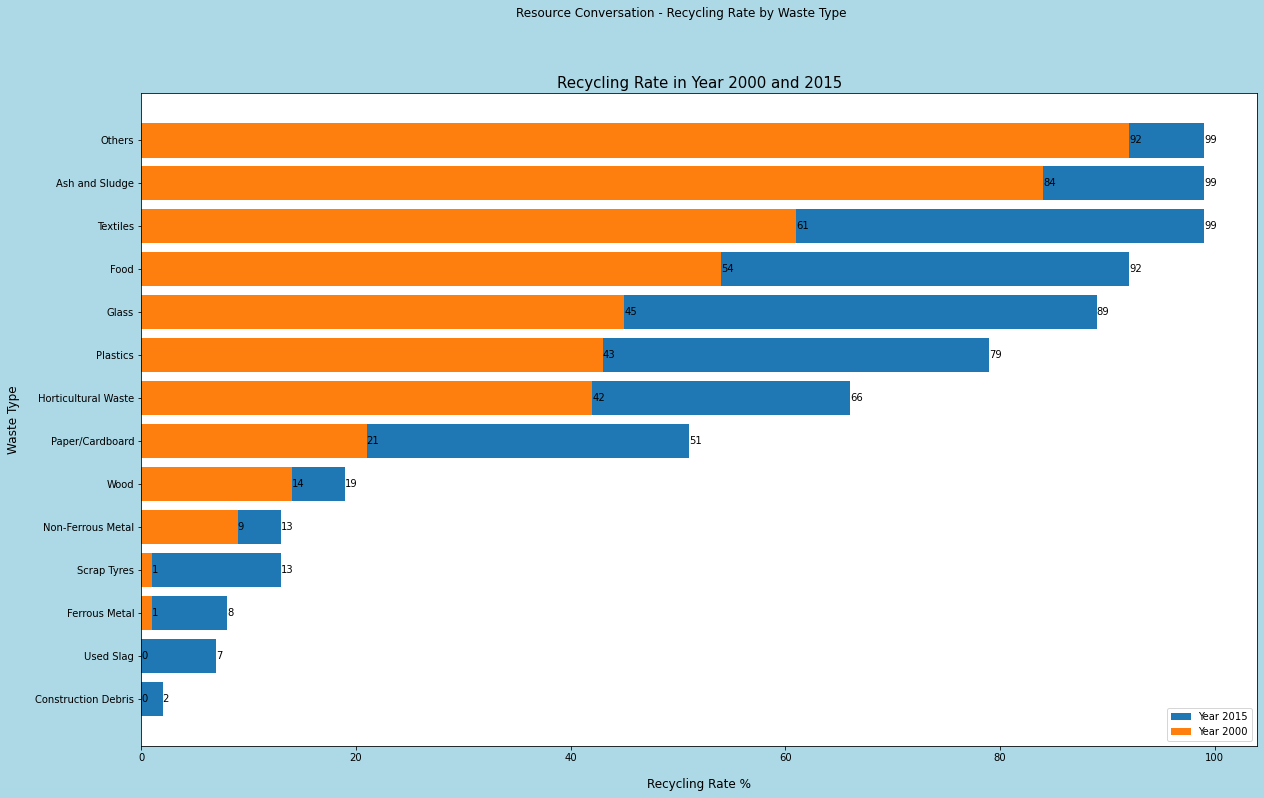

year
2015     2
2015     7
2015     8
2015    13
2015    13
2015    19
2015    51
2015    66
2015    79
2015    89
2015    92
2015    99
2015    99
2015    99
Name: recycling_rate, dtype: int64

In [21]:
df = pd.read_csv('datasets/recycling-rate-by-waste-type.csv',index_col='year')

#Cleaning data
year2000 = df.loc[2000]
year2015 = df.loc[2015]
year2000_values = year2000['recycling_rate'].sort_values()
year2015_values = year2015['recycling_rate'].sort_values()

category = df['waste_type'].unique()

#Plotting the graph
fig = plt.figure(figsize=(20,12))
fig.suptitle('Resource Conversation - Recycling Rate by Waste Type')
fig.set_facecolor("lightblue")
ax1 = fig.add_subplot(111)

ax1.set_title("Recycling Rate in Year 2000 and 2015",fontsize=15)
ax1.set_xlabel("Recycling Rate %",fontsize=12, labelpad=15)
ax1.set_ylabel("Waste Type",fontsize=12, labelpad=15)
bar = ax1.barh(category,year2015_values,label='Year 2015')
bar2 = ax1.barh(category,year2000_values,label='Year 2000')
ax1.bar_label(bar)
ax1.bar_label(bar2)
plt.legend()
plt.show()

df.to_csv('cleansedDatasets/recyclingRate.csv')
year2015_values

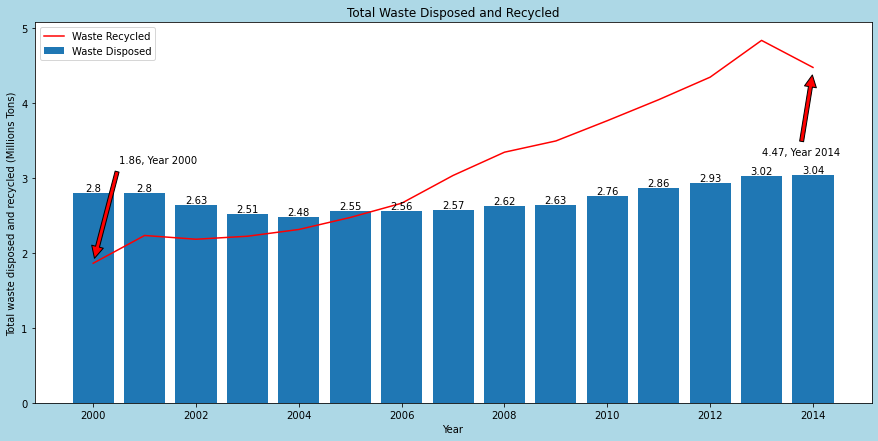

In [4]:
df = pd.read_csv('datasets/waste-disposed-of-and-recycled-annual.csv')

#Plotting the graph
fig = plt.figure(figsize=(15,7))
fig.set_facecolor('lightblue')
ax = fig.add_subplot()
ax.set_title('Total Waste Disposed and Recycled')
ax.set_xlabel('Year')
ax.set_ylabel('Total waste disposed and recycled (Millions Tons)')
linechart = ax.plot(df['year'],df['waste_recycled'],color='red',label='Waste Recycled')
ax.annotate("4.47, Year 2014", xy = (2014,4.42),xytext = (2013,3.3), arrowprops=dict(facecolor="red", shrink=0.05))
ax.annotate("1.86, Year 2000", xy = (2000,1.86),xytext = (2000.5,3.2), arrowprops=dict(facecolor="red", shrink=0.05))

bar = ax.bar(df['year'],df['waste_disposed_of'],label='Waste Disposed')
ax.bar_label(bar)
plt.legend()
plt.show()
df.to_csv('cleansedDatasets/disposedRecycled.csv')

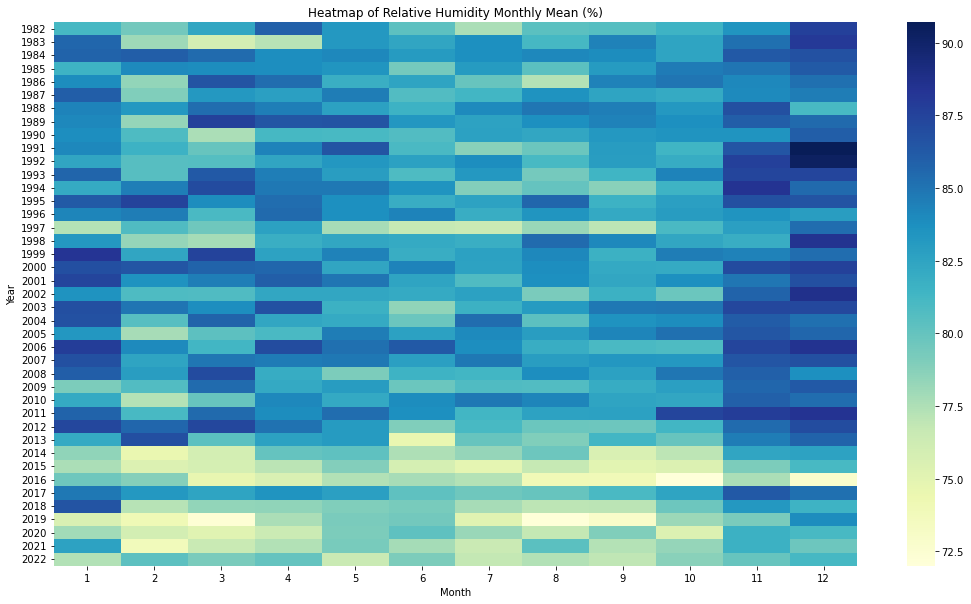

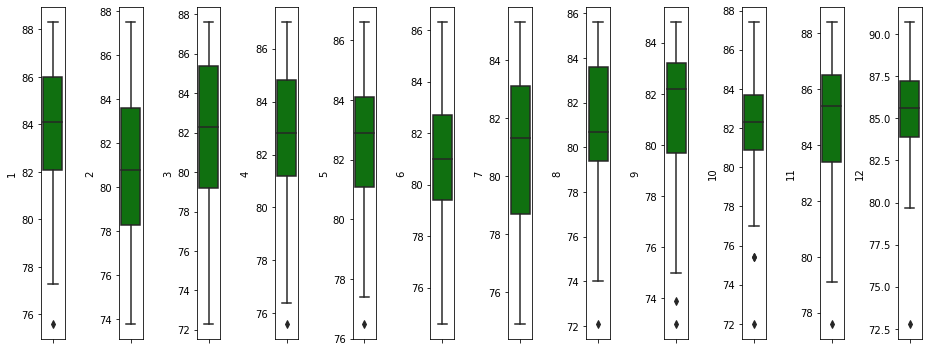

In [5]:
df = pd.read_csv('datasets/relative-humidity-monthly-mean.csv')
#Cleaning data
df['month'] = pd.to_datetime(df['month'])
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month
df2 = df.pivot('year', 'month', 'mean_rh')
#Plotting the graph
plt.figure(figsize=(18,10))
heatmap = sns.heatmap(df2, cmap='YlGnBu')

heatmap.set_xlabel('Month')
heatmap.set_ylabel('Year')
heatmap.set_title('Heatmap of Relative Humidity Monthly Mean (%)')
plt.show()

#Outlier Testing
fig, axMany = plt.subplots(1,12, figsize=(13,5))
colCnt = 0;
for item in df2.columns :
    sns.boxplot(y=df2[item] ,color='green',  ax=axMany[colCnt])
    colCnt = colCnt + 1
    plt.tight_layout()


plt.show()

df2.to_csv('cleansedDatasets/humidity.csv')

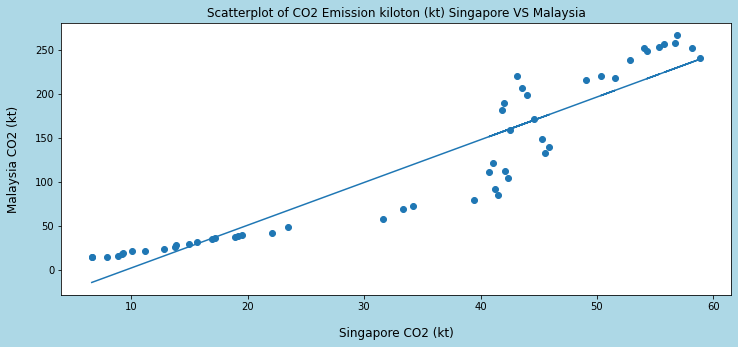

Intercept   -46.256716
Values_y      4.850088
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               Values_x   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     335.4
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           8.03e-24
Time:                        09:10:31   Log-Likelihood:                -253.82
No. Observations:                  52   AIC:                             511.6
Df Residuals:                      50   BIC:                             515.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

,Country,Substance,EDGAR Country Code,Year,Values
0,Malaysia,CO2,MYS,1970,14.267844
1,Singapore,CO2,SGP,1970,6.609142
2,Malaysia,CO2,MYS,1971,14.696044
3,Singapore,CO2,SGP,1971,6.633691
4,Malaysia,CO2,MYS,1972,14.718878
...,...,...,...,...,...
99,Singapore,CO2,SGP,2019,56.835101
100,Malaysia,CO2,MYS,2020,256.191489
101,Singapore,CO2,SGP,2020,55.797520
102,Malaysia,CO2,MYS,2021,251.555215


In [13]:
df = pd.read_csv('datasets/co2emission.csv')

#Cleaning data
df2 = df.dropna()
countriesNeeded = df2.loc[(df['Country'] == 'Singapore') | (df['Country'] == 'Malaysia')]
df3 = countriesNeeded.melt(id_vars=['Country','Substance','EDGAR Country Code'], var_name='Year', value_name='Values')
malaysiaRow = df3[(df3['Country'] == 'Malaysia')]
malaysiaRow.to_csv('cleansedDatasets/malaysiaC02.csv')
singaporeRow = df3[(df3['Country'] == 'Singapore')]
singaporeRow.to_csv('cleansedDatasets/singaporeC02.csv')

#Plotting the graph
fig = plt.figure(figsize = (12,5))
fig.set_facecolor("lightblue")
ax = fig.add_subplot()
ax.set_title("Scatterplot of CO2 Emission kiloton (kt) Singapore VS Malaysia",fontsize=12)
ax.set_xlabel("Singapore CO2 (kt)",fontsize=12, labelpad=15)
ax.set_ylabel("Malaysia CO2 (kt)",fontsize=12, labelpad=15)

plt.scatter(singaporeRow['Values'],malaysiaRow['Values'])
m,b = np.polyfit(singaporeRow['Values'],malaysiaRow['Values'],deg=1) 
plt.plot(singaporeRow['Values'], m*singaporeRow['Values'] + b)
plt.show()

#Fit the Model
df4 = pd.merge(malaysiaRow, singaporeRow, how='inner', on='Year')
df4.to_csv('cleansedDatasets/statsModel.csv')
stockModel = sm.OLS.from_formula("Values_x ~ Values_y", data=df4).fit()
# stockPredicts = stockModel.predict() 
# The linear model
print(stockModel.params)
print(stockModel.summary())
df3

## Text Analysis on Datasets Used

In [7]:
df = pd.read_csv('datasets/government-total-expenditure.csv',index_col='financial_year')
print("*** Government total expenditure dataset ***")
print()
print(f"Data Type: {df.dtypes}")
print()
print("Before Cleaning")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
df1 = df[(df.ministry == 'Sustainability and the Environment') & (df.type == 'Operating')]
print()
print("After Cleaning")
print(f"Number of Rows: {df1.shape[0]}")
print(f"Number of Columns: {df1.shape[1]}")
print()
print()
print("*** Solar PV Installations Dataset ***")
df3 = pd.read_csv('datasets/solar-pv-installations-by-ura-planning-region.csv')
df4 = df3.groupby(['year'])[['num_solar_pv_inst']].sum()
print()
print(f"Data Type: {df3.dtypes}")
print()
print("Before Cleaning")
print(f"Number of Rows: {df3.shape[0]}")
print(f"Number of Columns: {df3.shape[1]}")
print()
print("After Cleaning")
print(f"Number of Rows: {df4.shape[0]}")
print(f"Number of Columns: {df4.shape[1]}")

*** Government total expenditure dataset ***

Data Type: actual_revised_estimated     object
sector                       object
ministry                     object
type                         object
amount                        int64
percent_of_gdp              float64
dtype: object

Before Cleaning
Number of Rows: 950
Number of Columns: 6

After Cleaning
Number of Rows: 25
Number of Columns: 6


*** Solar PV Installations Dataset ***

Data Type: year                        int64
ura_planning_region        object
residential_status         object
num_solar_pv_inst           int64
inst_cap_kwac             float64
total_inst_cap_percent    float64
dtype: object

Before Cleaning
Number of Rows: 140
Number of Columns: 6

After Cleaning
Number of Rows: 14
Number of Columns: 1


In [8]:
df = pd.read_csv('datasets/recycling-rate-by-waste-type.csv',index_col='year')
print("*** Recycling Rate by Waste Type dataset ***")
print()
print(f"Data Type: {df.dtypes}")
print()
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

*** Recycling Rate by Waste Type dataset ***

Data Type: waste_type        object
recycling_rate     int64
dtype: object

Number of Rows: 224
Number of Columns: 2


In [9]:
df = pd.read_csv('datasets/waste-disposed-of-and-recycled-annual.csv')
print("*** Waste disposed and recycled dataset ***")
print()
print(f"Data Type: {df.dtypes}")
print()
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

*** Waste disposed and recycled dataset ***

Data Type: year                   int64
waste_disposed_of    float64
waste_recycled       float64
dtype: object

Number of Rows: 15
Number of Columns: 3


In [10]:
df = pd.read_csv('datasets/relative-humidity-monthly-mean.csv')
df['month'] = pd.to_datetime(df['month'])
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month
df2 = df.pivot('year', 'month', 'mean_rh')
print("*** Relative Humidity dataset ***")
print()
print(f"Data Type: {df.dtypes}")
print()
print("Before Cleaning")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print()
print("After Cleaning")
print(f"Number of Rows: {df2.shape[0]}")
print(f"Number of Columns: {df2.shape[1]}")

*** Relative Humidity dataset ***

Data Type: month        int64
mean_rh    float64
year         int64
dtype: object

Before Cleaning
Number of Rows: 492
Number of Columns: 3

After Cleaning
Number of Rows: 41
Number of Columns: 12


In [11]:
df = pd.read_csv('datasets/co2emission.csv')
df2 = df.dropna()
countriesNeeded = df2.loc[(df['Country'] == 'Singapore') | (df['Country'] == 'Malaysia')]
df3 = countriesNeeded.melt(id_vars=['Country','Substance','EDGAR Country Code'], var_name='Year', value_name='Values')
print("*** C02 Emission dataset ***")
print()
print(f"Data Type: {df.dtypes}")
print()
print("Before Cleaning")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print()
print(f"Number of Rows and Columns after dropping NA values")
print(f"Number of Rows: {df2.shape[0]}")
print(f"Number of Columns: {df2.shape[1]}")
print()
print("After Cleaning")
print(f"Number of Rows: {df3.shape[0]}")
print(f"Number of Columns: {df3.shape[1]}")

*** C02 Emission dataset ***

Data Type: Substance              object
EDGAR Country Code     object
Country                object
1970                  float64
1971                  float64
1972                  float64
1973                  float64
1974                  float64
1975                  float64
1976                  float64
1977                  float64
1978                  float64
1979                  float64
1980                  float64
1981                  float64
1982                  float64
1983                  float64
1984                  float64
1985                  float64
1986                  float64
1987                  float64
1988                  float64
1989                  float64
1990                  float64
1991                  float64
1992                  float64
1993                  float64
1994                  float64
1995                  float64
1996                  float64
1997                  float64
1998                  float64